## Initializing the Python environment

In [1]:
#!/usr/bin/env python
# -*- coding: UTF-8

In [2]:
# IMPORTING KEY PACKAGES
import csv # for reading in CSVs and turning them into dictionaries
import nltk # for natural language processing tools
import pandas # for working with dataframes
import numpy as np # for working with numbers
import matplotlib.pyplot as plt # for visualizations

In [3]:
# FOR CLEANING THE TEXT
from nltk.corpus import stopwords # for one method of eliminating stop words, to clean the text
stopenglish = list(stopwords.words("english")) # assign the string of english stopwords to a variable and turn it into a list
import string # for one method of eliminating punctuation
punctuations = list(string.punctuation) # assign the string of common punctuation symbols to a variable and turn it into a list
from nltk import word_tokenize # for tokenizing the text

## Reading in data two ways: list of dictionaries and pandas dataframe

In order to work with different kinds of analyses, I'll read in the preliminary data set (currently a CSV file) so it's available as both a list dictionaries and a dataframe.

It's worth noting that out of the 196 schools for which this data has web text, only about half were randomly selected. The other half I tracked down because they were missing URLs--and some of these were even closed, so I could only find website self-descriptions by using the Internet Archive. In other words, closed schools are over-represented in this early stage sample, so these results should be taken lightly.

In [4]:
sample = [] # make empty list
with open('../data/mission_data_prelim.csv', 'r', encoding = 'Latin-1')\
as csvfile: # open file                      
    reader = csv.DictReader(csvfile) # create a reader
    for row in reader: # loop through rows
        sample.append(row) # append each row to the list

In [5]:
# Take a look at the most important contents and the variables list
# in our sample (a list of dictionaries)--let's look at just the first entry
print(sample[1]["SCHNAM"], "\n", sample[1]["URL"], "\n", sample[1]["WEBTEXT"], "\n")
print(sample[1].keys())

THE ACADEMIES AT JONESBORO HIGH SCHOOL 
 http://www.jonesboroschools.net/schools/academies_at_jonesboro_high_school 
 The mission of the Academies at Jonesboro High School is to provide a high quality, research-based education for all students in order to equip them with the essential skills necessary to be successful in todayÕs changing global community. Through strong partnerships with business and community stakeholders, the Academies at Jonesboro High School will ensure high achievement in all subjects through an expanded curriculum and the use of data-driven methods to evaluate and implement proven instructional strategies. The Academies at JHS will foster respect for global diversity and maintain a commitment to create exceptional opportunities for the educational growth of every child.  Excellence is our Standard, not our Goal, for All Students   

dict_keys(['AM05M', 'BL10M', 'LEVEL', 'HP09M', 'HP05F', 'HIUGM', 'SPFEMALE', 'WEBTEXT', 'BL06F', 'TR11M', 'AS11F', 'WH01M', 'WH04M',

### Now to read the data in as a pandas dataframe!

In [6]:
df = pandas.read_csv("../data/mission_data_prelim.csv", encoding = 'Latin-1')
df = df.dropna(subset=["WEBTEXT"]) # drop any schools with no webtext that might have snuck in (none currently)

In [7]:
## Print the webtext from the first school in the dataframe
print(df.iloc[0, 5])

Quest is a public school chartered by the State Board of Education. As a public school, the campus has the responsibility to ensure all students meet the standards created by the Texas Education Agency. 


In [8]:
# Add additional variables for analysis:
# PCTETH = percentage of enrolled students belonging to a racial minority
# this includes American Indian, Asian, Hispanic, Black, Hawaiian, or Pacific Islander
df["PCTETH"] = (df["AM"] + df["ASIAN"] + df["HISP"] + df["BLACK"] + df["PACIFIC"]) / df["MEMBER"]

df["STR"] = df["MEMBER"] / df["FTE"] # Student/teacher ratio
df["PCTFRPL"] = df["TOTFRL"] / df["MEMBER"] # Percent of students receiving FRPL

# To add a word count to the data frame:
df['webtext_lc'] = df['WEBTEXT'].str.lower()
df['webtext_split'] = df['webtext_lc'].str.split()
df['word_count'] = df['webtext_split'].apply(len)

In [9]:
# for later analysis, create a pandas objects that is a groupby dataframe, grouped on each school's state
grouped_state = df.groupby("LSTATE")
# print(grouped_state.count())

## Descriptive statistics

In [10]:
#print(df.describe()) # get descriptive statistics for all numerical columns
print()
print(df['ULOCAL'].value_counts()) # frequency counts for categorical data
print()
print(df['LEVEL'].value_counts()) # treat grade range served as categorical
# Codes for level/ grade range served: 3 = High school, 2 = Middle school, 1 = Elementary, 4 = Other)
print()
print(df['LSTATE'].mode()) # find the most common state represented in these data
print(df['ULOCAL'].mode()) # find the most urbanicity represented in these data


11    78
21    36
13    21
12    19
41    11
42     9
33     6
32     6
23     4
31     3
22     3
Name: ULOCAL, dtype: int64

1    82
3    46
4    41
2    26
N     1
Name: LEVEL, dtype: int64

0    CA
dtype: object
0    11
dtype: int64


So most common areas for these charters is large city, then large suburb, then medium and small city, and then rural.

## Cleaning and tokenizing the text

In [11]:
#create new variable that applies the word_tokenize function to our sentence.
for school in sample:
    school["webtext_tokens"] = []
    school["webtext_tokens"] = word_tokenize(school["WEBTEXT"])

#This new variable contains the tokenized text.
print(sample[1]["webtext_tokens"])

['The', 'mission', 'of', 'the', 'Academies', 'at', 'Jonesboro', 'High', 'School', 'is', 'to', 'provide', 'a', 'high', 'quality', ',', 'research-based', 'education', 'for', 'all', 'students', 'in', 'order', 'to', 'equip', 'them', 'with', 'the', 'essential', 'skills', 'necessary', 'to', 'be', 'successful', 'in', 'todayÕs', 'changing', 'global', 'community', '.', 'Through', 'strong', 'partnerships', 'with', 'business', 'and', 'community', 'stakeholders', ',', 'the', 'Academies', 'at', 'Jonesboro', 'High', 'School', 'will', 'ensure', 'high', 'achievement', 'in', 'all', 'subjects', 'through', 'an', 'expanded', 'curriculum', 'and', 'the', 'use', 'of', 'data-driven', 'methods', 'to', 'evaluate', 'and', 'implement', 'proven', 'instructional', 'strategies', '.', 'The', 'Academies', 'at', 'JHS', 'will', 'foster', 'respect', 'for', 'global', 'diversity', 'and', 'maintain', 'a', 'commitment', 'to', 'create', 'exceptional', 'opportunities', 'for', 'the', 'educational', 'growth', 'of', 'every', 'chi

In [12]:
# Now we clean the webtext by removing punctuation and stopwords and rendering each word lower-case
# Let's keep a list of tokens both with and without stopwords to see how it changes things:
for school in sample:
    school["webstop_tokens"] = [] # to initialize, create an empty list for each new list
    school["webclean_tokens"] = [] 
    school["webstop_tokens"] = [word.lower() for word in school["webtext_tokens"] if (word not in punctuations)] # make each word lower-case and remove punctuations
    school["webclean_tokens"] = [word.lower() for word in school["webstop_tokens"] if (word not in stopenglish)] # then remove stopwords

print("Here's a school's webtext WITH stopwords:\n", sample[1]["webstop_tokens"])
print("\nAnd here's that same school's webtext WITHOUT stopwords:\n", sample[1]["webclean_tokens"])

Here's a school's webtext WITH stopwords:
 ['the', 'mission', 'of', 'the', 'academies', 'at', 'jonesboro', 'high', 'school', 'is', 'to', 'provide', 'a', 'high', 'quality', 'research-based', 'education', 'for', 'all', 'students', 'in', 'order', 'to', 'equip', 'them', 'with', 'the', 'essential', 'skills', 'necessary', 'to', 'be', 'successful', 'in', 'todayõs', 'changing', 'global', 'community', 'through', 'strong', 'partnerships', 'with', 'business', 'and', 'community', 'stakeholders', 'the', 'academies', 'at', 'jonesboro', 'high', 'school', 'will', 'ensure', 'high', 'achievement', 'in', 'all', 'subjects', 'through', 'an', 'expanded', 'curriculum', 'and', 'the', 'use', 'of', 'data-driven', 'methods', 'to', 'evaluate', 'and', 'implement', 'proven', 'instructional', 'strategies', 'the', 'academies', 'at', 'jhs', 'will', 'foster', 'respect', 'for', 'global', 'diversity', 'and', 'maintain', 'a', 'commitment', 'to', 'create', 'exceptional', 'opportunities', 'for', 'the', 'educational', 'growt

## Text lengths and type-token ratios (TTRs)

In [13]:
# Now calculate length of cleaned webtext by finding the number of words in webclean_tokens, 
# and compare with # words in unclean webtext. Also generate number of types (unique words) used:
for school in sample:
    school["webtext_nowords"] = len(school["webtext_tokens"])
    school["webstop_nowords"] = len(school["webstop_tokens"])
    school["webclean_nowords"] = len(school["webclean_tokens"])
    school["webstop_numtypes"] = len(set(school["webstop_tokens"]))
    school["webclean_numtypes"] = len(set(school["webclean_tokens"]))

print("For example, consider the first school: \n", "   Uncleaned length:", \
      sample[1]["webtext_nowords"], "\n          VERSUS", \
      "\n    Cleaned length:", sample[1]["webclean_nowords"])

For example, consider the first school: 
    Uncleaned length: 118 
          VERSUS 
    Cleaned length: 63


In [14]:
# First analytic step: Calculate type-token ratios for each school, which compares 
# the number of types (unique words used) with the number of words (including repetitions of words).
# Let's do this both with and without stop words, and then compare them:
school["TTR_clean"] = []
school["TTR_withstop"] = []
print("Here's the TTR for each school first with and then without stopwords:\n")
for school in sample:
    school["TTR_clean"] = school["webclean_numtypes"] / school["webclean_nowords"]
    school["TTR_withstop"] = school["webstop_numtypes"] / school["webstop_nowords"]
for school in sample[:20]:
    print(school["MSTATE"], school["SCHNAM"] + ":", "\n", school["TTR_withstop"], "vs.", school["TTR_clean"], "\n")

Here's the TTR for each school first with and then without stopwords:

AR QUEST MIDDLE SCHOOL OF PINE BLUFF: 
 0.4426751592356688 vs. 0.535 

AR THE ACADEMIES AT JONESBORO HIGH SCHOOL: 
 0.6396396396396397 vs. 0.8412698412698413 

AZ A CHILD'S VIEW SCHOOL: 
 0.7922077922077922 vs. 0.8947368421052632 

AZ AAEC - PARADISE VALLEY: 
 0.8444444444444444 vs. 0.8709677419354839 

AZ ABRAHAM LINCOLN TRADITIONAL SCHOOL: 
 0.6698113207547169 vs. 0.76 

AZ ACADEMY DEL SOL: 
 0.6194690265486725 vs. 0.7278911564625851 

AZ ACADEMY OF TUCSON ELEMENTARY SCHOOL: 
 0.4483870967741935 vs. 0.6404494382022472 

AZ DESERT MOSAIC SCHOOL: 
 0.6434782608695652 vs. 0.8208955223880597 

AZ KAIZEN EDUCATION FOUNDATION DBA SUMMIT HIGH SCHOOL: 
 0.47413793103448276 vs. 0.6363636363636364 

AZ OASIS HIGH SCHOOL: 
 0.6199095022624435 vs. 0.8195488721804511 

AZ SAGE ACADEMY: 
 0.5425219941348973 vs. 0.7427184466019418 

AZ SCHOOL FOR INTEGRATED ACADEMICS AND TECHNOLOGIES: 
 0.42953929539295393 vs. 0.5902489626556017

## Most frequent words

In [15]:
# First, aggregate all the cleaned webtext:
webtext_all = []
for school in sample:
    for word in school["webclean_tokens"]:
        webtext_all.append(word)

webtext_all[:30]

['quest',
 'middle',
 'schools¨',
 'schools',
 'focused',
 'high',
 'expectations',
 'behavior',
 'academics',
 'students',
 'must',
 'work',
 'hard',
 'meet',
 'goals',
 'fully',
 'succeed',
 'quest',
 'middle',
 'school',
 'students',
 'must',
 'consistently',
 'show',
 'leadership',
 'skills',
 'good',
 'behavior',
 'work',
 'ethic']

In [16]:
# Now apply the nltk function FreqDist to count the number of times each token occurs.
word_frequency = nltk.FreqDist(webtext_all)

#print out the 10 most frequent words using the function most_common
print(word_frequency.most_common(50))

[('students', 1739), ('school', 1661), ('learning', 736), ('education', 539), ('charter', 476), ('community', 470), ('student', 466), ('high', 415), ('program', 395), ('academic', 390), ('schools', 344), ('academy', 342), ('curriculum', 340), ('college', 328), ('skills', 320), ('teachers', 295), ('children', 280), ('grade', 267), ('environment', 241), ('provide', 238), ('success', 226), ('educational', 224), ('every', 217), ('work', 213), ('staff', 207), ('support', 207), ('year', 198), ('leadership', 198), ('arts', 190), ('development', 185), ('parents', 185), ('develop', 184), ('learn', 183), ('public', 182), ('state', 182), ('grades', 176), ('standards', 174), ('needs', 170), ('core', 169), ('instruction', 169), ('science', 168), ('world', 153), ('mission', 152), ('programs', 152), ('life', 151), ('new', 150), ('opportunities', 150), ('social', 148), ('one', 148), ('also', 146)]


## Visualizations

In [19]:
%matplotlib inline

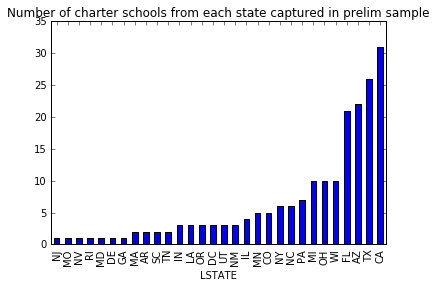

In [20]:
# here's the number of schools from each state, in a graph:
grouped_state['WEBTEXT'].count().sort_values(ascending=True).plot(kind = 'bar')
plt.title("Number of charter schools from each state captured in prelim sample")
plt.show()

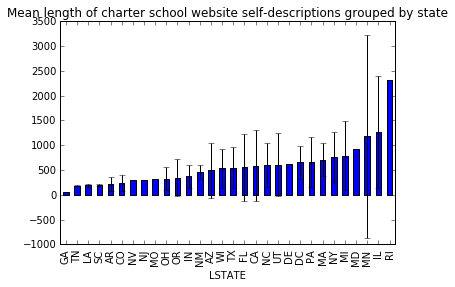

In [21]:
# here's the mean website self-description word count for schools grouped by state:
grouped_state['word_count'].mean().sort_values(ascending=True).plot(kind = 'bar', yerr = grouped_state["word_count"].std())
plt.title("Mean length of charter school website self-descriptions grouped by state")
plt.show()